In [35]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import matplotlib as mpl

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import configs

device = 'cpu'

# Load results

In [36]:
with open(f'{configs.engram_dir}02_learn_retrieve/results.p', 'rb') as f:
    results = pickle.load(f)

In [37]:
for key in results.keys():
    results[key] = np.array(results[key])

In [39]:
learn_gammas = results['learn_gammas']
retrieve_gammas = results['retrieve_gammas']
vals = results['vals']
nonlinearity = results['nonlinearity']

In [17]:
xs = np.sort(np.unique(learn_gammas))
ys = np.sort(np.unique(retrieve_gammas))

# Tanh

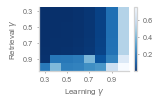

In [41]:
mat = np.zeros((xs.size, ys.size))*np.nan
for x_idx, x in enumerate(xs):
    for y_idx, y in enumerate(ys):
        idxs = np.logical_and(learn_gammas==x, retrieve_gammas==y)
        idxs = np.logical_and(idxs, nonlinearity=='Tanh')
        val = vals[idxs]
        mat[x_idx][y_idx] = np.mean(val)

plt.figure(figsize=(2.25, 1.5))
pcm = plt.imshow(
    mat, cmap="Blues_r",
    aspect='auto'
    )
plt.colorbar(pcm)
plt.xticks(np.arange(ys.size)[::2], ys[::2])
plt.yticks(np.arange(len(xs))[::2], xs[::2])
plt.xlabel('Learning $\gamma$')
plt.ylabel('Retrieval $\gamma$')
plt.tight_layout()
plt.savefig(f"../figures/S3g.png", dpi=300, transparent=True)
plt.show()

# Linear

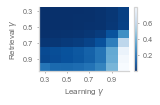

In [42]:
mat = np.zeros((xs.size, ys.size))*np.nan
for x_idx, x in enumerate(xs):
    for y_idx, y in enumerate(ys):
        idxs = np.logical_and(learn_gammas==x, retrieve_gammas==y)
        idxs = np.logical_and(idxs, nonlinearity=='None')
        val = vals[idxs]
        mat[x_idx][y_idx] = np.mean(val)

plt.figure(figsize=(2.25, 1.5))
pcm = plt.imshow(
    mat, cmap="Blues_r",
    aspect='auto'
    )
plt.colorbar(pcm)
plt.xticks(np.arange(ys.size)[::2], ys[::2])
plt.yticks(np.arange(len(xs))[::2], xs[::2])
plt.xlabel('Learning $\gamma$')
plt.ylabel('Retrieval $\gamma$')
plt.tight_layout()
plt.savefig(f"../figures/S3h.png", dpi=300, transparent=True)
plt.show()